<a href="https://colab.research.google.com/github/Harman1107/Major_Project_Parkinson/blob/master/copy_of_copy_of_major_project_using_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
from sklearn import svm
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('./Dataset-1.csv')

In [ ]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [ ]:
for column in parkinsons_data.columns:
    if parkinsons_data[column].dtype == 'object':
        parkinsons_data = parkinsons_data.drop(column, axis=1)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

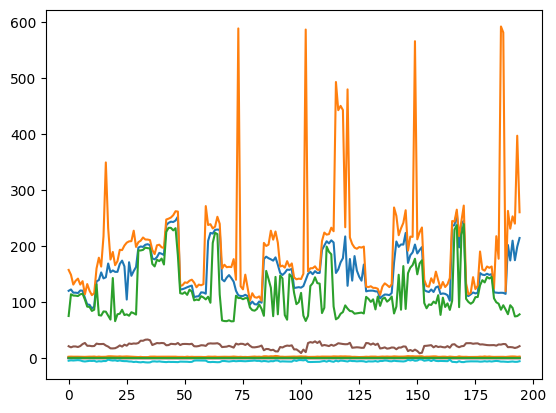

In [ ]:
plt.plot(parkinsons_data)
plt.show()


In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


In [ ]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

Separating the features & Target

In [ ]:
X = parkinsons_data.drop(columns=['status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data to training data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Training

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already scaled the features as shown in the provided code
# X_train_scaled and X_test_scaled

# Create and configure the logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

# Calculate the accuracy of the logistic regression model
accuracy_logistic = accuracy_score(Y_test, y_pred_logistic)
print("Accuracy (Logistic Regression):", accuracy_logistic)

# Calculate the F1 score for logistic regression
f1_logistic = f1_score(Y_test, y_pred_logistic)
print("F1 Score (Logistic Regression):", f1_logistic)

# Calculate the precision for logistic regression
precision_logistic = precision_score(Y_test, y_pred_logistic)
print("Precision (Logistic Regression):", precision_logistic)

# Calculate the recall for logistic regression
recall_logistic = recall_score(Y_test, y_pred_logistic)
print("Recall (Logistic Regression):", recall_logistic)

# Calculate the mean squared error (MSE) for logistic regression
mse_logistic = mean_squared_error(Y_test, y_pred_logistic)
print("MSE (Logistic Regression):", mse_logistic)

# Calculate the mean absolute error (MAE) for logistic regression
mae_logistic = mean_absolute_error(Y_test, y_pred_logistic)
print("MAE (Logistic Regression):", mae_logistic)

# Calculate the mean absolute percentage error (MAPE) for logistic regression
mape_logistic = np.mean(np.abs((Y_test - y_pred_logistic) / Y_test)) * 100
print("MAPE (Logistic Regression):", mape_logistic)

cm_logistic = confusion_matrix(Y_test, y_pred_logistic)
cm_display_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=[False, True])
cm_display_logistic.plot()
plt.title("Confusion Matrix for Logistic Regression")
plt.show()



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create and configure the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate the model
f1_mlp = f1_score(Y_test, y_pred_mlp)
print("F1 Score (MLP):", f1_mlp)

precision_mlp = precision_score(Y_test, y_pred_mlp)
print("Precision (MLP):", precision_mlp)

recall_mlp = recall_score(Y_test, y_pred_mlp)
print("Recall (MLP):", recall_mlp)

mse_mlp = mean_squared_error(Y_test, y_pred_mlp)
print("MSE (MLP):", mse_mlp)

mae_mlp = mean_absolute_error(Y_test, y_pred_mlp)
print("MAE (MLP):", mae_mlp)

# Calculate the mean absolute percentage error (MAPE) for MLP
mape_mlp = np.mean(np.abs((Y_test - y_pred_mlp) / Y_test)) * 100
print("MAPE (MLP):", mape_mlp)

cm_mlp = confusion_matrix(Y_test, y_pred_mlp)
cm_display_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=[False, True])
cm_display_mlp.plot()
plt.title("Confusion Matrix for MLP")
plt.show()


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already scaled the features as shown in the provided code
# X_train_scaled and X_test_scaled

# Create and configure the base weak learner (Decision Tree in this case)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Create and configure the AdaBoost model
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test_scaled)

# Calculate the accuracy of the AdaBoost model
accuracy_adaboost = accuracy_score(Y_test, y_pred_adaboost)
print("Accuracy (AdaBoost):", accuracy_adaboost)

# Calculate the F1 score for AdaBoost
f1_adaboost = f1_score(Y_test, y_pred_adaboost)
print("F1 Score (AdaBoost):", f1_adaboost)

# Calculate the precision for AdaBoost
precision_adaboost = precision_score(Y_test, y_pred_adaboost)
print("Precision (AdaBoost):", precision_adaboost)

# Calculate the recall for AdaBoost
recall_adaboost = recall_score(Y_test, y_pred_adaboost)
print("Recall (AdaBoost):", recall_adaboost)

# Calculate the mean squared error (MSE) for AdaBoost
mse_adaboost = mean_squared_error(Y_test, y_pred_adaboost)
print("MSE (AdaBoost):", mse_adaboost)

# Calculate the mean absolute error (MAE) for AdaBoost
mae_adaboost = mean_absolute_error(Y_test, y_pred_adaboost)
print("MAE (AdaBoost):", mae_adaboost)

# Calculate the mean absolute percentage error (MAPE) for AdaBoost
mape_adaboost = np.mean(np.abs((Y_test - y_pred_adaboost) / Y_test)) * 100
print("MAPE (AdaBoost):", mape_adaboost)

cm_adaboost = confusion_matrix(Y_test, y_pred_adaboost)
cm_display_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost, display_labels=[False, True])
cm_display_adaboost.plot()
plt.title("Confusion Matrix for AdaBoost")
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have already scaled the features as shown in the provided code
# X_train_scaled and X_test_scaled

# Reshape the input data for LSTM
X_train_lstm = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Create and configure the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(1, X_train_scaled.shape[1]), activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(X_train_lstm, Y_train, epochs=10, batch_size=32)

# Evaluate the model
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test_lstm, Y_test)
print("Test Loss (LSTM):", loss_lstm)
print("Test Accuracy (LSTM):", accuracy_lstm)

# Make predictions on the test set
y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = np.round(y_pred_lstm).flatten()

# Calculate the F1 score for LSTM
f1_lstm = f1_score(Y_test, y_pred_lstm)
print("F1 Score (LSTM):", f1_lstm)

# Calculate the precision for LSTM
precision_lstm = precision_score(Y_test, y_pred_lstm)
print("Precision (LSTM):", precision_lstm)

# Calculate the recall for LSTM
recall_lstm = recall_score(Y_test, y_pred_lstm)
print("Recall (LSTM):", recall_lstm)

# Calculate the mean squared error (MSE) for LSTM
mse_lstm = mean_squared_error(Y_test, y_pred_lstm)
print("MSE (LSTM):", mse_lstm)

# Calculate the mean absolute error (MAE) for LSTM
mae_lstm = mean_absolute_error(Y_test, y_pred_lstm)
print("MAE (LSTM):", mae_lstm)

# Calculate the mean absolute percentage error (MAPE) for LSTM
mape_lstm = np.mean(np.abs((Y_test - y_pred_lstm) / Y_test)) * 100
print("MAPE (LSTM):", mape_lstm)

cm_lstm = confusion_matrix(Y_test, y_pred_lstm)
cm_display_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=[False, True])
cm_display_lstm.plot()
plt.title("Confusion Matrix for LSTM")
plt.show()


Support Vector Machine Model Using Different Kernel Values and Confusion Matrix

Accuracy score of training data using Kernel Value :-  linear  :  0.8846153846153846 



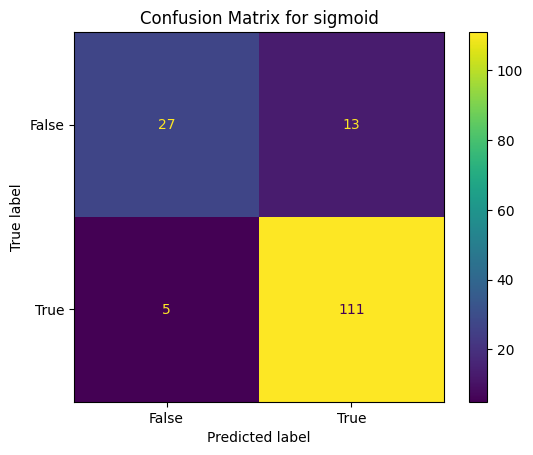

Accuracy score of training data using Kernel Value :-  poly  :  0.8653846153846154 



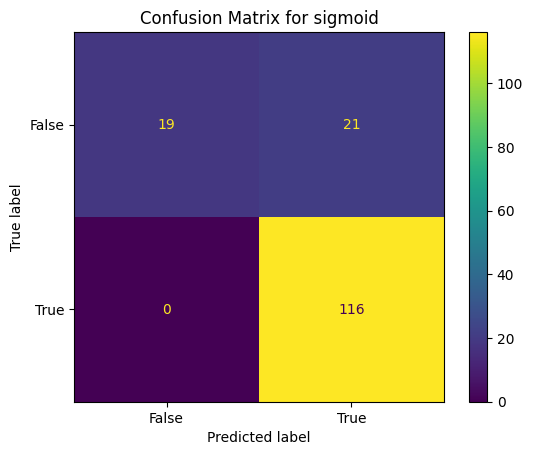

Accuracy score of training data using Kernel Value :-  rbf  :  0.9166666666666666 



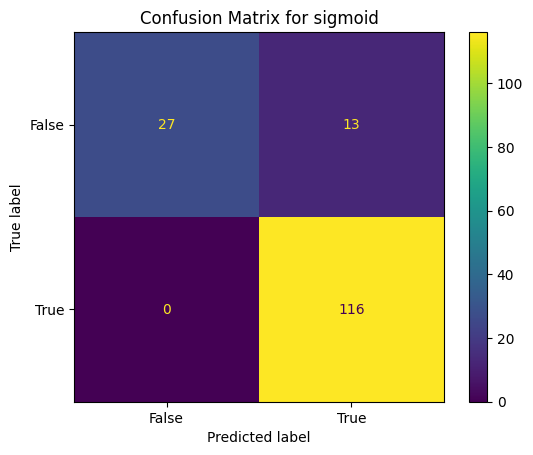

Accuracy score of training data using Kernel Value :-  sigmoid  :  0.8525641025641025 



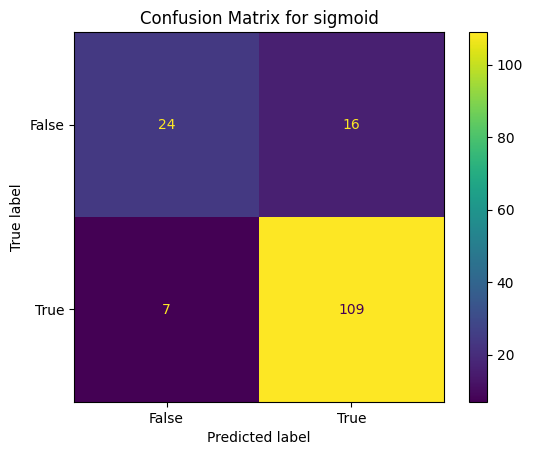

Accuracy score of training data using RF is :-  1.0
Accuracy score of training data using GNB is :-  0.7243589743589743
Accuracy score of training data using XGB is :-  0.8525641025641025


In [ ]:
kernelValues = ['linear', 'poly','rbf', 'sigmoid']
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_GNB = GaussianNB()
model_XGB = xgb.XGBClassifier()
for v in kernelValues:
    model = svm.SVC(kernel=v)
    model.fit(X_train, Y_train)
    X_train_prediction = model.predict(X_train)
    training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
    confusion_matrix =  metrics.confusion_matrix(Y_train, X_train_prediction)
    print('Accuracy score of training data using Kernel Value :- ', v," : ", training_data_accuracy,"\n")
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    # sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='gist_heat', cbar=True)
    cm_display.plot()
    plt.title("Confusion Matrix for sigmoid")
    plt.show()

model_RF.fit(X_train,Y_train)
model_GNB.fit(X_train, Y_train)
model_XGB.fit(X_train, Y_train)
x_pred_xgb = model.predict(X_train)
x_pred_rf = model_RF.predict(X_train)
x_pred_gnb = model_GNB.predict(X_train)
accuracy_rf = accuracy_score(Y_train, x_pred_rf)
accuracy_gnb = accuracy_score(Y_train, x_pred_gnb)
accuracy_xgb = accuracy_score(Y_train, x_pred_xgb)
print('Accuracy score of training data using RF is :- ', accuracy_rf )
print('Accuracy score of training data using GNB is :- ', accuracy_gnb )
print('Accuracy score of training data using XGB is :- ', accuracy_xgb )



In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='sigmoid')

Model Evaluation

Accuracy Score

In [ ]:
# accuracy score on training data
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
confusion_matrix =  metrics.confusion_matrix(Y_train, X_train_prediction)

Accuracy score of training data :  0.8525641025641025


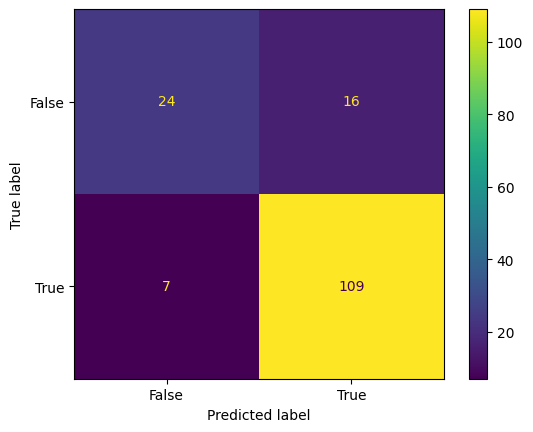

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
# accuracy score on training data

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, Y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
# Make predictions on the test set
# Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Calculate the F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)

# Calculate the precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("RMSE:", rmse)
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("MAE:", mae)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print("MAPE:", mape)

cm_rnn = confusion_matrix(Y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rnn, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix for ANN")
plt.show()

NameError: ignored

Building a Predictive System

In [ ]:
# input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# # changing input data to a numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # reshape the numpy array
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# # standardize the data
# std_data = scaler.transform(input_data_reshaped)

# prediction = modelLinear.predict(std_data)
# print(prediction)


# if (prediction[0] == 0):
#   print("The Person does not have Parkinsons Disease")

# else:
#   print("The Person has Parkinsons")


# RNN Model

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
# X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, SimpleRNN

# # Build the RNN model
# model_rnn = Sequential()
# model_rnn.add(SimpleRNN(32, input_shape=(1, X_train.shape[2])))
# model_rnn.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# model_rnn.fit(X_train, Y_train, epochs=10, batch_size=32)
# loss, accuracy = model_rnn.evaluate(X_test, Y_test)
# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)


Epoch 1/10
5/5 [==============================] - 3s 5ms/step - loss: 0.6535 - accuracy: 0.5769
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 0.5975 - accuracy: 0.6795
Epoch 3/10
5/5 [==============================] - 0s 6ms/step - loss: 0.5706 - accuracy: 0.6987
Epoch 4/10
5/5 [==============================] - 0s 4ms/step - loss: 0.5456 - accuracy: 0.6987
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 0.5257 - accuracy: 0.7244
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.7436
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4929 - accuracy: 0.7564
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7500
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.7692
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 0.5418 - accuracy: 0.6410
Test Loss: 0.5417761206626892
Test Accu

In [ ]:
# Make predictions on the test set
# Evaluate the model
y_pred = model_rnn.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Calculate the F1 score
f1 = f1_score(Y_test, y_pred)
print("F1 Score:", f1)

# Calculate the precision
precision = precision_score(Y_test, y_pred)
print("Precision:", precision)

# Calculate the recall
recall = recall_score(Y_test, y_pred)
print("Recall:", recall)

# Calculate the mean squared error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("MSE:", mse)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print("RMSE:", rmse)
# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print("MAE:", mae)

# Calculate the mean absolute percentage error (MAPE)
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
print("MAPE:", mape)

cm_rnn = confusion_matrix(Y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_rnn, display_labels = [False, True])
cm_display.plot()
plt.title("Confusion Matrix for RNN")
plt.show()
# plt.figure(figsize = (15,8))
# sns.heatmap(cm_rnn, annot=True, fmt='g', cmap='gist_heat',cbar=True)
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.title("Confusion Matrix for RNN")
# plt.show()

# cm = confusion_matrix(Y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

TypeError: ignored